In [1]:
%serialconnect --port=COM9

Ready.


Heltec IOT Lora Wireless Stick V3 esp32 Wifi 
Wireless Stick is a part of the “Heltec LoRa“ series, with the following features:

CE Certificate;

Microprocessor: ESP32-S3FN8 (Xtensa® 32-bit LX7 dual core processor, five stage pipeline rack Structure, main frequency up to 240MHz);

SX1262 LoRa node chip;

Micro USB interface with a complete voltage regulator, ESD protection, short circuit protection, RF shielding, and other protection measures;

Onboard SH1.25-2 battery interface, integrated lithium battery management system (charge and discharge management, overcharge protection, battery power detection, USB / battery power automatic switching);

Integrated WiFi, LoRa, Bluetooth three network connections, onboard Wi-Fi, Bluetooth dedicated 2.4GHz metal 3D antenna, reserved IPEX (U.FL) interface for LoRa use;

Onboard 0.49-inch 64*32 dot matrix OLED display, which can be used to display debugging information, battery power, and other information;

Integrated CP2102 USB to serial port chip, convenient for program downloading,
debugging information printing.

 This is a standard LoRaWAN protocol that can communicate with any gateway/base station running the LoRaWAN protocol (requires serial number activation, only the development of the company) The board is available;

With good RF circuit design and basic low-power design (sleep current ≤800uA), it is convenient for IoT application vendors to quickly verify solutions and deploy applications.

Product technical support, please contact customer service!

https://github.c

https://escapequotes.net/heltec-esp32-display-lcd-text-micropython/ 
https://github.com/lemariva/uPyLoRaWAN
 https://www.thethingsnetwork.org/forum/t/big-esp32-sx127x-topic-part-3/18436om/case485/ESP_LoRa.git

Heltec Wifi Lora 32(v2) Pinout 
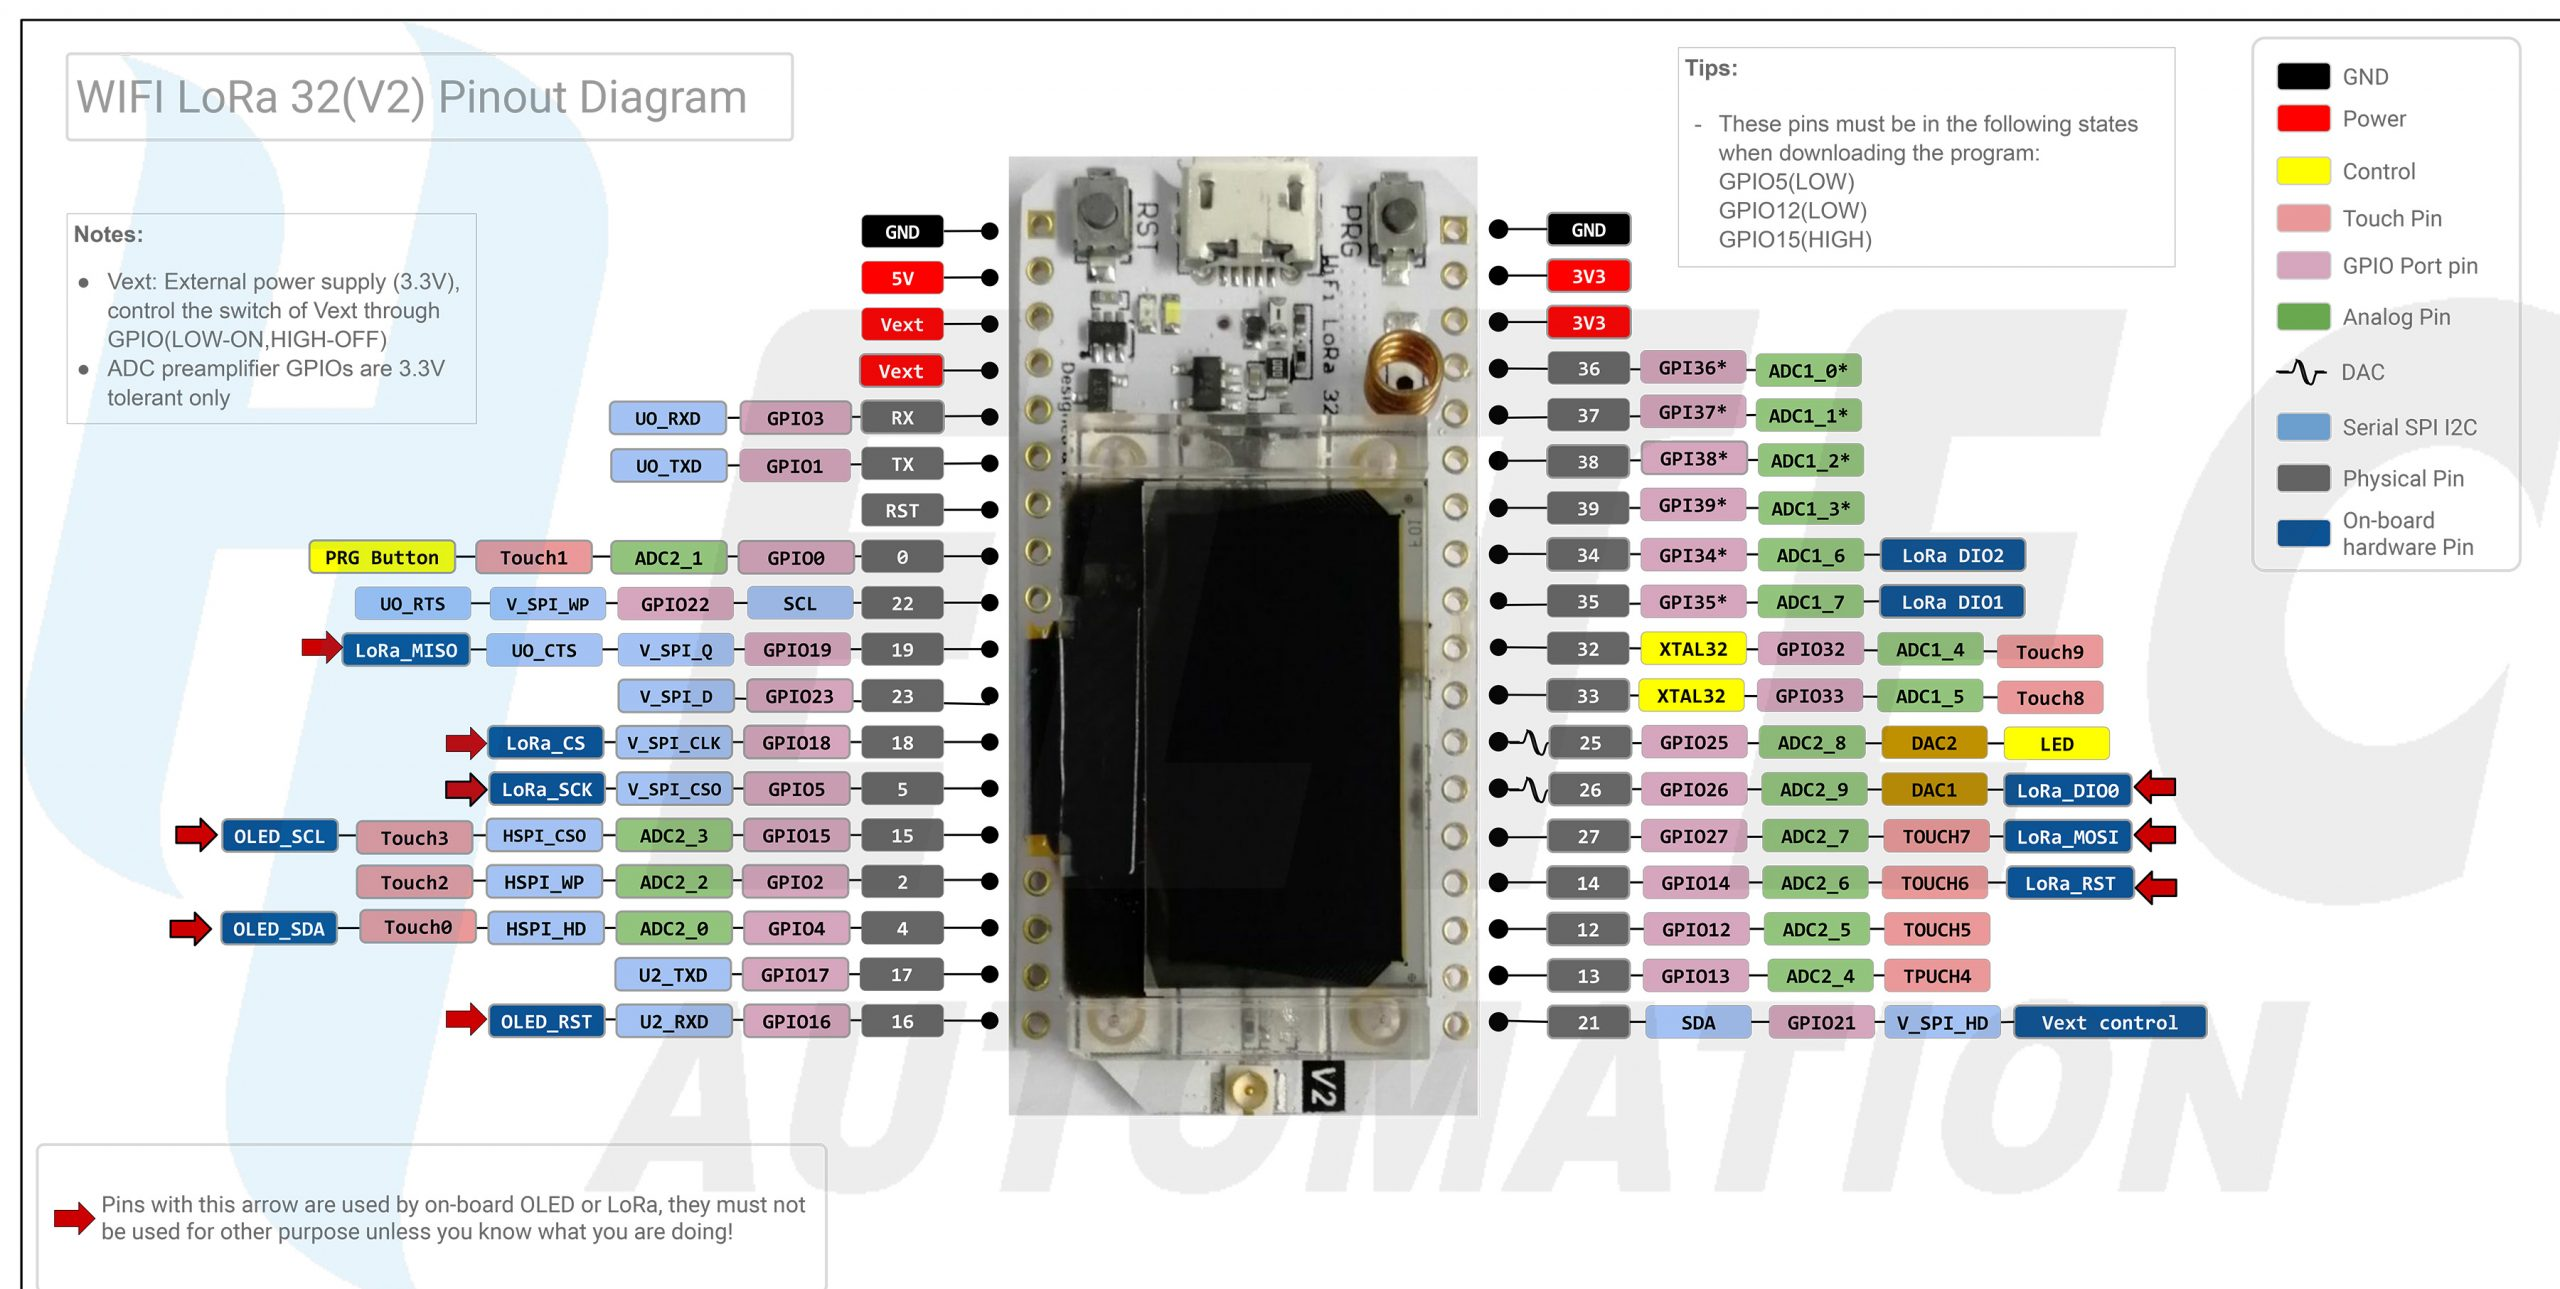

https://github.com/ehong-tl/micropySX126X
https://github.com/JustDr00py/heltec-LoRa32-Micropython
https://heltec.org/project/wifi-lora-32-v3/
https://github.com/phoughton/pylorawan

In [2]:
import network
import time

wlan = network.WLAN(network.STA_IF) # create station interface
wlan.active(True)       # activate the interface
wlan.isconnected()      # check if the station is connected to an AP
time.sleep_ms(500)
if not wlan.isconnected():
  print('connecting to network...')
  wlan.connect('West3') # connect to an AP
  time.sleep_ms(500)
  while not wlan.isconnected():
    pass
print('network config:', wlan.ifconfig())

connecting to network...
network config: ('192.168.50.32', '255.255.255.0', '192.168.50.1', '192.168.50.1')


In [3]:
# MicroPython SSD1306 OLED driver, I2C and SPI interfaces

from micropython import const
import framebuf


# register definitions
SET_CONTRAST = const(0x81)
SET_ENTIRE_ON = const(0xA4)
SET_NORM_INV = const(0xA6)
SET_DISP = const(0xAE)
SET_MEM_ADDR = const(0x20)
SET_COL_ADDR = const(0x21)
SET_PAGE_ADDR = const(0x22)
SET_DISP_START_LINE = const(0x40)
SET_SEG_REMAP = const(0xA0)
SET_MUX_RATIO = const(0xA8)
SET_IREF_SELECT = const(0xAD)
SET_COM_OUT_DIR = const(0xC0)
SET_DISP_OFFSET = const(0xD3)
SET_COM_PIN_CFG = const(0xDA)
SET_DISP_CLK_DIV = const(0xD5)
SET_PRECHARGE = const(0xD9)
SET_VCOM_DESEL = const(0xDB)
SET_CHARGE_PUMP = const(0x8D)


# Subclassing FrameBuffer provides support for graphics primitives
# http://docs.micropython.org/en/latest/pyboard/library/framebuf.html
class SSD1306(framebuf.FrameBuffer):
    def __init__(self, width, height, external_vcc):
        self.width = width
        self.height = height
        self.external_vcc = external_vcc
        self.pages = self.height // 8
        self.buffer = bytearray(self.pages * self.width)
        super().__init__(self.buffer, self.width, self.height, framebuf.MONO_VLSB)
        self.init_display()

    def init_display(self):
        for cmd in (
            SET_DISP,  # display off
            # address setting
            SET_MEM_ADDR,
            0x00,  # horizontal
            # resolution and layout
            SET_DISP_START_LINE,  # start at line 0
            SET_SEG_REMAP | 0x01,  # column addr 127 mapped to SEG0
            SET_MUX_RATIO,
            self.height - 1,
            SET_COM_OUT_DIR | 0x08,  # scan from COM[N] to COM0
            SET_DISP_OFFSET,
            0x00,
            SET_COM_PIN_CFG,
            0x02 if self.width > 2 * self.height else 0x12,
            # timing and driving scheme
            SET_DISP_CLK_DIV,
            0x80,
            SET_PRECHARGE,
            0x22 if self.external_vcc else 0xF1,
            SET_VCOM_DESEL,
            0x30,  # 0.83*Vcc
            # display
            SET_CONTRAST,
            0xFF,  # maximum
            SET_ENTIRE_ON,  # output follows RAM contents
            SET_NORM_INV,  # not inverted
            SET_IREF_SELECT,
            0x30,  # enable internal IREF during display on
            # charge pump
            SET_CHARGE_PUMP,
            0x10 if self.external_vcc else 0x14,
            SET_DISP | 0x01,  # display on
        ):  # on
            self.write_cmd(cmd)
        self.fill(0)
        self.show()

    def poweroff(self):
        self.write_cmd(SET_DISP)

    def poweron(self):
        self.write_cmd(SET_DISP | 0x01)

    def contrast(self, contrast):
        self.write_cmd(SET_CONTRAST)
        self.write_cmd(contrast)

    def invert(self, invert):
        self.write_cmd(SET_NORM_INV | (invert & 1))

    def rotate(self, rotate):
        self.write_cmd(SET_COM_OUT_DIR | ((rotate & 1) << 3))
        self.write_cmd(SET_SEG_REMAP | (rotate & 1))

    def show(self):
        x0 = 0
        x1 = self.width - 1
        if self.width != 128:
            # narrow displays use centred columns
            col_offset = (128 - self.width) // 2
            x0 += col_offset
            x1 += col_offset
        self.write_cmd(SET_COL_ADDR)
        self.write_cmd(x0)
        self.write_cmd(x1)
        self.write_cmd(SET_PAGE_ADDR)
        self.write_cmd(0)
        self.write_cmd(self.pages - 1)
        self.write_data(self.buffer)


class SSD1306_I2C(SSD1306):
    def __init__(self, width, height, i2c, addr=0x3C, external_vcc=False):
        self.i2c = i2c
        self.addr = addr
        self.temp = bytearray(2)
        self.write_list = [b"\x40", None]  # Co=0, D/C#=1
        super().__init__(width, height, external_vcc)

    def write_cmd(self, cmd):
        self.temp[0] = 0x80  # Co=1, D/C#=0
        self.temp[1] = cmd
        self.i2c.writeto(self.addr, self.temp)

    def write_data(self, buf):
        self.write_list[1] = buf
        self.i2c.writevto(self.addr, self.write_list)


class SSD1306_SPI(SSD1306):
    def __init__(self, width, height, spi, dc, res, cs, external_vcc=False):
        self.rate = 10 * 1024 * 1024
        dc.init(dc.OUT, value=0)
        res.init(res.OUT, value=0)
        cs.init(cs.OUT, value=1)
        self.spi = spi
        self.dc = dc
        self.res = res
        self.cs = cs
        import time

        self.res(1)
        time.sleep_ms(1)
        self.res(0)
        time.sleep_ms(10)
        self.res(1)
        super().__init__(width, height, external_vcc)

    def write_cmd(self, cmd):
        self.spi.init(baudrate=self.rate, polarity=0, phase=0)
        self.cs(1)
        self.dc(0)
        self.cs(0)
        self.spi.write(bytearray([cmd]))
        self.cs(1)

    def write_data(self, buf):
        self.spi.init(baudrate=self.rate, polarity=0, phase=0)
        self.cs(1)
        self.dc(1)
        self.cs(0)
        self.spi.write(buf)
        self.cs(1)

In [4]:
import sys
import os
import time
import machine
import ubinascii
from machine import Pin, SoftI2C
from time import sleep

In [5]:
# # Heltec LoRa 32 with OLED Display
# oled_width = 128
# oled_height = 64
# # OLED reset pin
# i2c_rst = Pin(21, Pin.OUT)
# # Initialize the OLED display
# i2c_rst.value(0)
# time.sleep_ms(5)
# i2c_rst.value(1) # must be held high after initialization
# # Setup the I2C lines
# i2c_scl = Pin(15, Pin.OUT, Pin.PULL_UP)
# i2c_sda = Pin(4, Pin.OUT, Pin.PULL_UP)
# # Create the bus object
# i2c = SoftI2C(scl=i2c_scl, sda=i2c_sda)
# # Create the display object
# oled = SSD1306_I2C(oled_width, oled_height, i2c)
# oled.fill(0)
# oled.text(wlan.ifconfig()[0], 0, 0)
# oled.text('HELLO WiFi ESP32', 0, 25)
# oled.text('escapequotes.net', 0, 55)
  
# #oled.line(0, 0, 50, 25, 1)
# oled.show()

In [6]:
device_config = {
    'miso':11,
    'mosi':10,
    'ss':8,
    'sck':9,
    'dio_0':14,
    'reset':12,
    'led':25, 
}
app_config = {
    'loop': 200,
    'sleep': 100,
}
lora_parameters = {
    'frequency': 915E6, 
    'tx_power_level': 2, 
    'signal_bandwidth': 125E3,    
    'spreading_factor': 8, 
    'coding_rate': 5, 
    'preamble_length': 8,
    'implicit_header': False, 
    'sync_word': 0x34, 
    'enable_CRC': False,
    'invert_IQ': False,
}

In [7]:
#LORA Driver
from time import sleep
from machine import SoftSPI, Pin
import gc

PA_OUTPUT_RFO_PIN = 0
PA_OUTPUT_PA_BOOST_PIN = 1

# registers
REG_FIFO = 0x00
REG_OP_MODE = 0x01
REG_FRF_MSB = 0x06
REG_FRF_MID = 0x07
REG_FRF_LSB = 0x08
REG_PA_CONFIG = 0x09
REG_LNA = 0x0c
REG_FIFO_ADDR_PTR = 0x0d

REG_FIFO_TX_BASE_ADDR = 0x0e
FifoTxBaseAddr = 0x00
# FifoTxBaseAddr = 0x80

REG_FIFO_RX_BASE_ADDR = 0x0f
FifoRxBaseAddr = 0x00
REG_FIFO_RX_CURRENT_ADDR = 0x10
REG_IRQ_FLAGS_MASK = 0x11
REG_IRQ_FLAGS = 0x12
REG_RX_NB_BYTES = 0x13
REG_PKT_RSSI_VALUE = 0x1a
REG_PKT_SNR_VALUE = 0x1b
REG_MODEM_CONFIG_1 = 0x1d
REG_MODEM_CONFIG_2 = 0x1e
REG_PREAMBLE_MSB = 0x20
REG_PREAMBLE_LSB = 0x21
REG_PAYLOAD_LENGTH = 0x22
REG_FIFO_RX_BYTE_ADDR = 0x25
REG_MODEM_CONFIG_3 = 0x26
REG_RSSI_WIDEBAND = 0x2c
REG_DETECTION_OPTIMIZE = 0x31
REG_DETECTION_THRESHOLD = 0x37
REG_SYNC_WORD = 0x39
REG_DIO_MAPPING_1 = 0x40
REG_VERSION = 0x42

# invert IQ
REG_INVERTIQ = 0x33
RFLR_INVERTIQ_RX_MASK = 0xBF
RFLR_INVERTIQ_RX_OFF = 0x00
RFLR_INVERTIQ_RX_ON = 0x40
RFLR_INVERTIQ_TX_MASK = 0xFE
RFLR_INVERTIQ_TX_OFF = 0x01
RFLR_INVERTIQ_TX_ON = 0x00

REG_INVERTIQ2 = 0x3B
RFLR_INVERTIQ2_ON = 0x19
RFLR_INVERTIQ2_OFF = 0x1D

# modes
MODE_LONG_RANGE_MODE = 0x80  # bit 7: 1 => LoRa mode
MODE_SLEEP = 0x00
MODE_STDBY = 0x01
MODE_TX = 0x03
MODE_RX_CONTINUOUS = 0x05
MODE_RX_SINGLE = 0x06

# PA config
PA_BOOST = 0x80

# IRQ masks
IRQ_TX_DONE_MASK = 0x08
IRQ_PAYLOAD_CRC_ERROR_MASK = 0x20
IRQ_RX_DONE_MASK = 0x40
IRQ_RX_TIME_OUT_MASK = 0x80

# Buffer size
MAX_PKT_LENGTH = 255

__DEBUG__ = True

class SX127x:

    default_parameters = {
            'frequency': 915E6, 
            'tx_power_level': 2, 
            'signal_bandwidth': 125E3,    
            'spreading_factor': 8, 
            'coding_rate': 5, 
            'preamble_length': 8,
            'implicit_header': False, 
            'sync_word': 0x34, 
            'enable_CRC': False,
            'invert_IQ': False,
            }

    def __init__(self,
                 spi,
                 pins,
                 parameters=default_parameters):
        
        self._spi = spi
        self._pins = pins
        self._parameters = parameters
        self._lock = False

        # setting pins
        if "dio_0" in self._pins:
            self._pin_rx_done = Pin(self._pins["dio_0"], Pin.IN)
        if "ss" in self._pins:
            self._pin_ss = Pin(self._pins["ss"], Pin.OUT)
        # if "led" in self._pins:
        #     self._led_status = Pin(self._pins["led"], Pin.OUT)

        # check hardware version
        init_try = True
        re_try = 0
        while init_try and re_try < 5:
            version = self.read_register(REG_VERSION)
            re_try = re_try + 1
            if version != 0:
                init_try = False
        # if version != 0x12:
        #    raise Exception('Invalid version.')

        if __DEBUG__:
            print("SX version: {}".format(version))


        # put in LoRa and sleep mode
        self.sleep()

        # config
        self.set_frequency(self._parameters['frequency'])
        self.set_signal_bandwidth(self._parameters['signal_bandwidth'])

        # set LNA boost
        self.write_register(REG_LNA, self.read_register(REG_LNA) | 0x03)

        # set auto AGC
        self.write_register(REG_MODEM_CONFIG_3, 0x04)

        self.set_tx_power(self._parameters['tx_power_level'])
        self._implicit_header_mode = None
        self.implicit_header_mode(self._parameters['implicit_header'])
        self.set_spreading_factor(self._parameters['spreading_factor'])
        self.set_coding_rate(self._parameters['coding_rate'])
        self.set_preamble_length(self._parameters['preamble_length'])
        self.set_sync_word(self._parameters['sync_word'])
        self.enable_CRC(self._parameters['enable_CRC'])
        self.invert_IQ(self._parameters["invert_IQ"])

        # set LowDataRateOptimize flag if symbol time > 16ms (default disable on reset)
        # self.write_register(REG_MODEM_CONFIG_3, self.read_register(REG_MODEM_CONFIG_3) & 0xF7)  # default disable on reset
        bw_parameter = self._parameters["signal_bandwidth"]
        sf_parameter = self._parameters["spreading_factor"]

        if 1000 / (bw_parameter / 2**sf_parameter) > 16:
            self.write_register(
                REG_MODEM_CONFIG_3, 
                self.read_register(REG_MODEM_CONFIG_3) | 0x08
            )

        # set base addresses
        self.write_register(REG_FIFO_TX_BASE_ADDR, FifoTxBaseAddr)
        self.write_register(REG_FIFO_RX_BASE_ADDR, FifoRxBaseAddr)

        self.standby()

    def begin_packet(self, implicit_header_mode = False):
        self.standby()
        self.implicit_header_mode(implicit_header_mode)

        # reset FIFO address and paload length
        self.write_register(REG_FIFO_ADDR_PTR, FifoTxBaseAddr)
        self.write_register(REG_PAYLOAD_LENGTH, 0)

    def end_packet(self):
        # put in TX mode
        self.write_register(REG_OP_MODE, MODE_LONG_RANGE_MODE | MODE_TX)

        # wait for TX done, standby automatically on TX_DONE
        while self.read_register(REG_IRQ_FLAGS) & IRQ_TX_DONE_MASK == 0:
            pass

        # clear IRQ's
        self.write_register(REG_IRQ_FLAGS, IRQ_TX_DONE_MASK)

        self.collect_garbage()

    def write(self, buffer):
        currentLength = self.read_register(REG_PAYLOAD_LENGTH)
        size = len(buffer)

        # check size
        size = min(size, (MAX_PKT_LENGTH - FifoTxBaseAddr - currentLength))

        # write data
        for i in range(size):
            self.write_register(REG_FIFO, buffer[i])

        # update length
        self.write_register(REG_PAYLOAD_LENGTH, currentLength + size)
        return size

    def set_lock(self, lock = False):
        self._lock = lock

    def println(self, msg, implicit_header = False):
        self.set_lock(True)  # wait until RX_Done, lock and begin writing.

        self.begin_packet(implicit_header)

        if isinstance(msg, str):
            message = msg.encode()
            
        self.write(message)

        self.end_packet()

        self.set_lock(False) # unlock when done writing
        self.collect_garbage()

    def get_irq_flags(self):
        irq_flags = self.read_register(REG_IRQ_FLAGS)
        self.write_register(REG_IRQ_FLAGS, irq_flags)
        return irq_flags

    def packet_rssi(self):
        rssi = self.read_register(REG_PKT_RSSI_VALUE)
        return (rssi - (164 if self._frequency < 868E6 else 157))

    def packet_snr(self):
        snr = self.read_register(REG_PKT_SNR_VALUE)
        return snr * 0.25

    def standby(self):
        self.write_register(REG_OP_MODE, MODE_LONG_RANGE_MODE | MODE_STDBY)

    def sleep(self):
        self.write_register(REG_OP_MODE, MODE_LONG_RANGE_MODE | MODE_SLEEP)

    def set_tx_power(self, level, outputPin = PA_OUTPUT_PA_BOOST_PIN):
        self._tx_power_level = level

        if (outputPin == PA_OUTPUT_RFO_PIN):
            # RFO
            level = min(max(level, 0), 14)
            self.write_register(REG_PA_CONFIG, 0x70 | level)

        else:
            # PA BOOST
            level = min(max(level, 2), 17)
            self.write_register(REG_PA_CONFIG, PA_BOOST | (level - 2))

    def set_frequency(self, frequency):
        self._frequency = frequency

        freq_reg = int(int(int(frequency) << 19) / 32000000) & 0xFFFFFF

        self.write_register(REG_FRF_MSB, (freq_reg & 0xFF0000) >> 16)
        self.write_register(REG_FRF_MID, (freq_reg & 0xFF00) >> 8)
        self.write_register(REG_FRF_LSB, (freq_reg & 0xFF))

    def set_spreading_factor(self, sf):
        sf = min(max(sf, 6), 12)
        self.write_register(REG_DETECTION_OPTIMIZE, 0xc5 if sf == 6 else 0xc3)
        self.write_register(REG_DETECTION_THRESHOLD, 0x0c if sf == 6 else 0x0a)
        self.write_register(
            REG_MODEM_CONFIG_2, 
            (self.read_register(REG_MODEM_CONFIG_2) & 0x0f) | ((sf << 4) & 0xf0)
        )

    def set_signal_bandwidth(self, sbw):
        bins = (7.8E3, 10.4E3, 15.6E3, 20.8E3, 31.25E3, 41.7E3, 62.5E3, 125E3, 250E3)

        bw = 9

        if sbw < 10:
            bw = sbw
        else:
            for i in range(len(bins)):
                if sbw <= bins[i]:
                    bw = i
                    break

        self.write_register(
            REG_MODEM_CONFIG_1, 
            (self.read_register(REG_MODEM_CONFIG_1) & 0x0f) | (bw << 4)
        )

    def set_coding_rate(self, denominator):
        denominator = min(max(denominator, 5), 8)
        cr = denominator - 4
        self.write_register(
            REG_MODEM_CONFIG_1, 
            (self.read_register(REG_MODEM_CONFIG_1) & 0xf1) | (cr << 1)
        )

    def set_preamble_length(self, length):
        self.write_register(REG_PREAMBLE_MSB,  (length >> 8) & 0xff)
        self.write_register(REG_PREAMBLE_LSB,  (length >> 0) & 0xff)

    def enable_CRC(self, enable_CRC = False):
        modem_config_2 = self.read_register(REG_MODEM_CONFIG_2)
        config = modem_config_2 | 0x04 if enable_CRC else modem_config_2 & 0xfb
        self.write_register(REG_MODEM_CONFIG_2, config)

    def invert_IQ(self, invert_IQ):
        self._parameters["invertIQ"] = invert_IQ
        if invert_IQ:
            self.write_register(
                REG_INVERTIQ,
                (
                    (
                        self.read_register(REG_INVERTIQ)
                        & RFLR_INVERTIQ_TX_MASK
                        & RFLR_INVERTIQ_RX_MASK
                    )
                    | RFLR_INVERTIQ_RX_ON
                    | RFLR_INVERTIQ_TX_ON
                ),
            )
            self.write_register(REG_INVERTIQ2, RFLR_INVERTIQ2_ON)
        else:
            self.write_register(
                REG_INVERTIQ,
                (
                    (
                        self.read_register(REG_INVERTIQ)
                        & RFLR_INVERTIQ_TX_MASK
                        & RFLR_INVERTIQ_RX_MASK
                    )
                    | RFLR_INVERTIQ_RX_OFF
                    | RFLR_INVERTIQ_TX_OFF
                ),
            )
            self.write_register(REG_INVERTIQ2, RFLR_INVERTIQ2_OFF)

    def set_sync_word(self, sw):
        self.write_register(REG_SYNC_WORD, sw)

    def set_channel(self, parameters):
        self.standby()
        for key in parameters:
            if key == "frequency":
                self.set_frequency(parameters[key])
                continue
            if key == "invert_IQ":
                self.invert_IQ(parameters[key])
                continue
            if key == "tx_power_level":
                self.set_tx_power(parameters[key])
                continue

    def dump_registers(self):
        for i in range(128):
            print("0x{:02X}: {:02X}".format(i, self.read_register(i)), end="")
            if (i + 1) % 4 == 0:
                print()
            else:
                print(" | ", end="")

    def implicit_header_mode(self, implicit_header_mode = False):
        if self._implicit_header_mode != implicit_header_mode:  # set value only if different.
            self._implicit_header_mode = implicit_header_mode
            modem_config_1 = self.read_register(REG_MODEM_CONFIG_1)
            config = (modem_config_1 | 0x01 
                    if implicit_header_mode else modem_config_1 & 0xfe)
            self.write_register(REG_MODEM_CONFIG_1, config)

    def receive(self, size = 0):
        self.implicit_header_mode(size > 0)
        if size > 0: 
            self.write_register(REG_PAYLOAD_LENGTH, size & 0xff)

        # The last packet always starts at FIFO_RX_CURRENT_ADDR
        # no need to reset FIFO_ADDR_PTR
        self.write_register(
            REG_OP_MODE, MODE_LONG_RANGE_MODE | MODE_RX_CONTINUOUS
        )

    def on_receive(self, callback):
        self._on_receive = callback

        if self._pin_rx_done:
            if callback:
                self.write_register(REG_DIO_MAPPING_1, 0x00)
                self._pin_rx_done.irq(
                    trigger=Pin.IRQ_RISING, handler = self.handle_on_receive
                )
            else:
                self._pin_rx_done.detach_irq()

    def handle_on_receive(self, event_source):
        self.set_lock(True)              # lock until TX_Done
        irq_flags = self.get_irq_flags()

        if (irq_flags == IRQ_RX_DONE_MASK):  # RX_DONE only, irq_flags should be 0x40
            # automatically standby when RX_DONE
            if self._on_receive:
                payload = self.read_payload()
                self._on_receive(self, payload)

        elif self.read_register(REG_OP_MODE) != (
            MODE_LONG_RANGE_MODE | MODE_RX_SINGLE
            ):
            # no packet received.
            # reset FIFO address / # enter single RX mode
            self.write_register(REG_FIFO_ADDR_PTR, FifoRxBaseAddr)
            self.write_register(
                REG_OP_MODE, 
                MODE_LONG_RANGE_MODE | MODE_RX_SINGLE
            )

        self.set_lock(False)             # unlock in any case.
        self.collect_garbage()
        return True

    def received_packet(self, size = 0):
        irq_flags = self.get_irq_flags()

        self.implicit_header_mode(size > 0)
        if size > 0: 
            self.write_register(REG_PAYLOAD_LENGTH, size & 0xff)

        # if (irq_flags & IRQ_RX_DONE_MASK) and \
           # (irq_flags & IRQ_RX_TIME_OUT_MASK == 0) and \
           # (irq_flags & IRQ_PAYLOAD_CRC_ERROR_MASK == 0):

        if (irq_flags == IRQ_RX_DONE_MASK):  
            # RX_DONE only, irq_flags should be 0x40
            # automatically standby when RX_DONE
            return True
 
        elif self.read_register(REG_OP_MODE) != (MODE_LONG_RANGE_MODE | MODE_RX_SINGLE):
            # no packet received.
            # reset FIFO address / # enter single RX mode
            self.write_register(REG_FIFO_ADDR_PTR, FifoRxBaseAddr)
            self.write_register(
                REG_OP_MODE, 
                MODE_LONG_RANGE_MODE | MODE_RX_SINGLE
            )

    def read_payload(self):
        # set FIFO address to current RX address
        # fifo_rx_current_addr = self.read_register(REG_FIFO_RX_CURRENT_ADDR)
        self.write_register(
            REG_FIFO_ADDR_PTR, 
            self.read_register(REG_FIFO_RX_CURRENT_ADDR)
        )

        # read packet length
        if self._implicit_header_mode:
            packet_length = self.read_register(REG_PAYLOAD_LENGTH)  
        else:
            packet_length = self.read_register(REG_RX_NB_BYTES)

        payload = bytearray()
        for i in range(packet_length):
            payload.append(self.read_register(REG_FIFO))

        self.collect_garbage()
        return bytes(payload)

    def read_register(self, address, byteorder = 'big', signed = False):
        response = self.transfer(address & 0x7f)
        return int.from_bytes(response, byteorder)

    def write_register(self, address, value):
        self.transfer(address | 0x80, value)


    def transfer(self, address, value = 0x00):
        response = bytearray(1)

        self._pin_ss.value(0)

        self._spi.write(bytes([address]))
        self._spi.write_readinto(bytes([value]), response)

        self._pin_ss.value(1)

        return response

    def blink_led(self, times = 1, on_seconds = 0.1, off_seconds = 0.1):
        for i in range(times):
            if self._led_status:
                self._led_status.value(True)
                sleep(on_seconds)
                self._led_status.value(False)
                sleep(off_seconds)

    def collect_garbage(self):
        gc.collect()
        if __DEBUG__:
            print('[Memory - free: {}   allocated: {}]'.format(gc.mem_free(), gc.mem_alloc()))

In [8]:
#Config_Lora
def mac2eui(mac):
    mac = mac[0:6] + 'fffe' + mac[6:]
    return hex(int(mac[0:2], 16) ^ 2)[2:] + mac[2:]

def get_millis():
    millisecond = time.ticks_ms()
    return millisecond

def get_nodename():
    uuid = ubinascii.hexlify(machine.unique_id()).decode()
    node_name = "ESP_" + uuid
    return node_name

In [9]:
#Lora Sender
def send(lora):
    counter = 0
    print("LoRa Sender")
    payload = 'Hello ({0})'.format(counter)
    print("Sending packet: \n{}\n".format(payload))
    print("{0} RSSI: {1}".format(payload, lora.packet_rssi()))
    lora.println(payload)

    counter += 1
    sleep(5)

In [10]:
#Lora Reciever
def receive(lora):
    print("LoRa Receiver")
    # oled.fill(0)
    # oled.text(wlan.ifconfig()[0], 0, 0)
    # oled.text('Reciever: ', 0, 25)

    if lora.received_packet():
        print('something here')
        payload = lora.read_payload()
        print(payload)
        msg = "pkt: {}".format(payload)
        # write_screen(oled, screen)
        print(f'Recieved: {msg}', 0, 55)
    # oled.show()

In [11]:
device_spi = SoftSPI(baudrate = 10000000, 
        polarity = 0, phase = 0, bits = 8, firstbit = SoftSPI.MSB,
        sck = Pin(device_config['sck'], Pin.OUT, Pin.PULL_DOWN),
        mosi = Pin(device_config['mosi'], Pin.OUT, Pin.PULL_UP),
        miso = Pin(device_config['miso'], Pin.IN, Pin.PULL_UP))

lora = SX127x(device_spi, pins=device_config, parameters=lora_parameters)
print(lora)
example = 'sender'
# example = 'receiver'

if __name__ == '__main__':
    try:
        while True:
            send(lora)
            time.sleep(1)
            receive(lora)
            time.sleep(1)
    except KeyboardInterrupt:
        print('interrupted!')



SX version: 170
<SX127x object at 3fca94a0>
LoRa Sender
Sending packet: 
Hello (0)

Hello (0) RSSI: 13
[Memory - free: 133824   allocated: 31680]
[Memory - free: 133840   allocated: 31664]
.LoRa Receiver
LoRa Sender
Sending packet: 
Hello (0)

Hello (0) RSSI: 13
[Memory - free: 133824   allocated: 31680]
[Memory - free: 133840   allocated: 31664]
.LoRa Receiver
LoRa Sender
Sending packet: 
Hello (0)

Hello (0) RSSI: 13
[Memory - free: 133824   allocated: 31680]
[Memory - free: 133840   allocated: 31664]
.LoRa Receiver
LoRa Sender
Sending packet: 
Hello (0)

Hello (0) RSSI: 13
[Memory - free: 133824   allocated: 31680]
[Memory - free: 133840   allocated: 31664]
..LoRa Receiver
LoRa Sender
Sending packet: 
Hello (0)

Hello (0) RSSI: 13
[Memory - free: 133824   allocated: 31680]
[Memory - free: 133840   allocated: 31664]
.LoRa Receiver
LoRa Sender
Sending packet: 
Hello (0)

Hello (0) RSSI: 13
[Memory - free: 133824   allocated: 31680]
[Memory - free: 133840   allocated: 31664]
.LoRa Rece